## Project proposal: Can Chest Pain Type and Age accurately predict the presence of heart disease?

In [2]:
library(tidyverse)
library(tidymodels)
library(readr)
library(utils)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [9]:
# Read the data we need from web into R; the dataset I choose is "Cleveland" dataset.

heart_disease_data <- read_csv("data/heart_disease/processed.cleveland.data",
                               c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

heart_disease_data[ heart_disease_data == "?" ] <- NA

#Select needed variables; this step is used for cleaning and wrangling the data into tidy format.
heart_disease_data <- heart_disease_data |>
  mutate(presc = ifelse(is.na(num), NA, (num > 0))) |>
  filter(!is.na(presc)) |>
  mutate(presc = as_factor(presc)) |>
  select(age, chol, num, presc)

#Display the first few rows as a table.
head(heart_disease_data)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
63,233,0,FALSE
67,286,2,TRUE
67,229,1,TRUE
37,250,0,FALSE
41,204,0,FALSE
56,236,0,FALSE


In [10]:
#Create training and testing sets
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = presc)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

#Display both training and testing sets
head(heart_disease_train)
head(heart_disease_test)

age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
37,250,0,FALSE
41,204,0,FALSE
56,236,0,FALSE
57,192,0,FALSE
44,263,0,FALSE
52,199,0,FALSE


age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
63,233,0,FALSE
57,354,0,FALSE
53,203,1,TRUE
56,294,0,FALSE
48,275,0,FALSE
49,266,0,FALSE


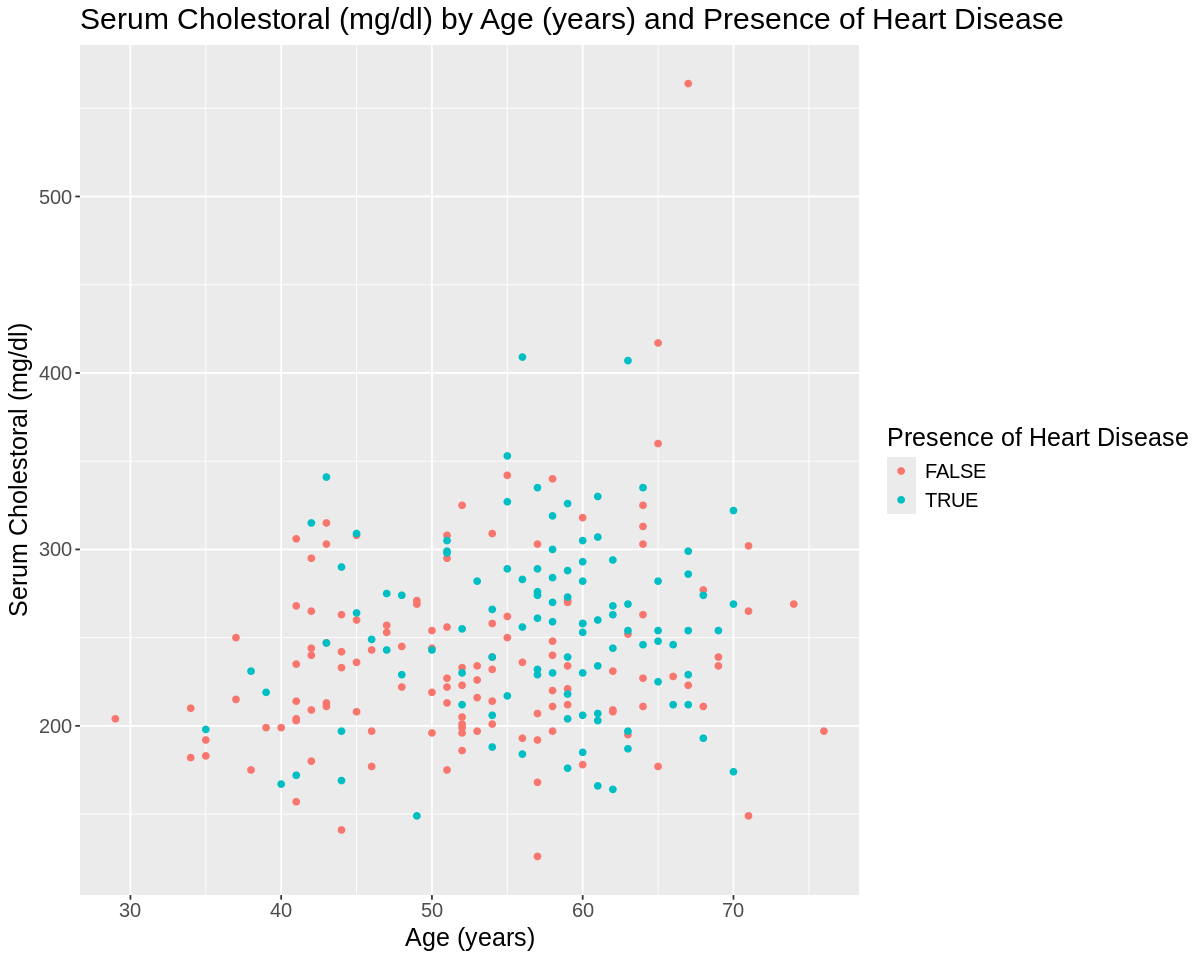

In [13]:
# Now, we can put test set aside, 
# and use only training set to create scatter plot in order to visualize the relationship between "Age" and "Serum Cholestoral". 

options(repr.plot.width = 10, repr.plot.height = 8)

heart_disease_gg <- ggplot(heart_disease_train, aes(x = age, y = chol, colour = presc)) +
    geom_point() +
    labs(colour = "Presence of Heart Disease") +
    xlab("Age (years)") + 
    ylab("Serum Cholestoral (mg/dl)") + 
    theme(text = element_text(size=15)) +
    labs(title = "Serum Cholestoral (mg/dl) by Age (years) and Presence of Heart Disease")

heart_disease_gg
    





**Methodology**


heart_disease_gg <- ggplot(heart_disease_train, aes(x = age, y = cp, color = presc)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = c("FALSE" = "#E41A1C", "TRUE" = "#377EB8")) +  # More distinct colors
  labs(
    title = "Chest Pain Type by Age and Presence of Heart Disease",
    x = "Age (in years)",
    y = "Chest Pain Type",
    color = "Presence of Heart Disease"
  ) +
  theme_minimal() +
  theme(
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.text = element_text(size = 10)
  )
heart_disease_gg